# Orders datasets

## Loading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

orders = pd.read_csv("./orders/orders.csv", encoding = 'unicode_escape')
orders_2 = pd.read_csv("./second set/orders_2.csv", encoding = 'unicode_escape')
# pd.set_option("display.max_columns",None)

In [2]:
# Check for incosistent dimensions
print("Shape:", orders.shape)
print("Shape:", orders_2.shape)

Shape: (1048575, 15)
Shape: (411201, 15)


In [3]:
# Dimensions are good, show preview of data
orders.head()

,Customer number,DoB,Gender,PoR,Order number,Order date,Product number,Sub category,Category,Count,Price,Expected delivery time,Actual delivery time,Reason of return,Rating
0,1034725,15/09/1984,Man,Loppersum,1606586,7-12-2016,5183337092063,Garden sets,Garden furniture,1,1049.97,2,2,NaN,2
1,1049989,01/06/1969,Man,Goeree-Overflakkee,554370,15-01-2016,4174149044532,Garden tables,Garden furniture,1,366.90,8,8,NaN,-1
2,1068587,19/02/1970,Man,Terneuzen,1146785,16-05-2014,7167356147773,Garden statues,Garden decoration,1,493.95,2,2,NaN,-1
3,1026863,27/11/1972,Man,Sittard-Geleen,1146785,14-05-2014,4112354045616,Garden sets,Garden furniture,1,234.74,2,5,NaN,-1
4,1049989,01/06/1969,Man,Goeree-Overflakkee,554370,15-01-2016,3163858019499,Garden sets,Garden furniture,1,1436.62,3,8,NaN,-1


In [4]:
# And second set
orders_2.head()

,Customer Number,DoB,Gender,PoR,Order number,Order date,Product number,Sub category,Category,Count,Price,Expected delivery time,Actual delivery time,Reason of return,Rating
0,1019749.0,03/05/1966,Man,Bernheze,1827247.0,20/01/2018,4.105803e+12,Garden tables,Garden furniture,1.0,736.87,2.0,6.0,NaN,4.0
1,1050134.0,23/09/1973,Man,Bergen op Zoom,1939208.0,14/05/2018,3.111773e+12,Spades,Garden hand tools,4.0,144.60,5.0,8.0,NaN,2.0
2,1019749.0,03/05/1966,Man,Bernheze,1827247.0,20/01/2018,3.196789e+12,Garden chairs,Garden furniture,1.0,724.15,4.0,4.0,NaN,4.0
3,1064956.0,10/02/1983,Man,Heerenveen,1920730.0,23/04/2018,7.164400e+12,Garden tables,Garden furniture,1.0,625.52,4.0,9.0,NaN,-1.0
4,1038008.0,21/09/1980,Man,Noordoostpolder,1951166.0,27/05/2018,1.124206e+12,Party tents,Sun protection,1.0,786.69,4.0,9.0,NaN,-1.0


## Cleaning the Data

### Checking for missing data

In [5]:
# Show missing data for both sets
print("First set missing data: ")
print(orders.isnull().sum(), "\n")

print("Second set missing data: ")
print(orders_2.isnull().sum(), "\n")

First set missing data: 
Customer number                0
DoB                            0
Gender                         0
PoR                            0
Order number                   0
Order date                     0
Product number                 0
Sub category                   0
Category                       0
Count                          0
Price                          0
Expected delivery time         0
Actual delivery time           0
Reason of return          997625
Rating                         0
dtype: int64 

Second set missing data: 
Customer Number                1
DoB                            1
Gender                         1
PoR                            1
Order number                   1
Order date                  6931
Product number                24
Sub category                   1
Category                       1
Count                          1
Price                          1
Expected delivery time         1
Actual delivery time           1
Reason of 

In [6]:
# Drop missing values from second set
orders_2 = orders_2.dropna(how='all')

# Check if missing data has been removed
print("Missing data: ")
print(orders_2.isnull().sum(), "\n")

Missing data: 
Customer Number                0
DoB                            0
Gender                         0
PoR                            0
Order number                   0
Order date                  6930
Product number                23
Sub category                   0
Category                       0
Count                          0
Price                          0
Expected delivery time         0
Actual delivery time           0
Reason of return          402120
Rating                         0
dtype: int64 



### Make smaller set for quick exploration

In [7]:
orders_small = orders.truncate(before=200001, after=210000)
orders_small.shape

(10000, 15)

### Look at data types and change if necessary

In [8]:
# Create method to look at both sets
def viewSetInfo():
    print("First set:")
    print(orders.info(), "\n")

    print("Second set:")
    print(orders_2.info())
    
viewSetInfo()

First set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
Customer number           1048575 non-null int64
DoB                       1048575 non-null object
Gender                    1048575 non-null object
PoR                       1048575 non-null object
Order number              1048575 non-null int64
Order date                1048575 non-null object
Product number            1048575 non-null object
Sub category              1048575 non-null object
Category                  1048575 non-null object
Count                     1048575 non-null int64
Price                     1048575 non-null float64
Expected delivery time    1048575 non-null int64
Actual delivery time      1048575 non-null int64
Reason of return          50950 non-null object
Rating                    1048575 non-null int64
dtypes: float64(1), int64(6), object(8)
memory usage: 120.0+ MB
None 

Second set:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 

In [9]:
# Change date types and reformat in first set (date of birth and order date)
# Leave out second set as these columns will not be used there
orders_small['DoB'] = pd.to_datetime(orders_small['DoB'])
orders_small['DoB'] = orders_small['DoB'].dt.strftime('%d/%m/%Y')
orders_small['Order date'] = pd.to_datetime(orders_small['Order date'])
orders_small['Order date'] = orders_small['Order date'].dt.strftime('%d/%m/%Y')

In [10]:
# Show unique values in the gender column
print(orders_small['Gender'].value_counts(dropna=False), "\n")
print(orders_2['Gender'].value_counts(dropna=True))

Man      6966
Woman    3033
\           1
Name: Gender, dtype: int64 

Man      286922
Woman    124201
\            77
Name: Gender, dtype: int64


Both datasets contain 'man', 'woman' and ' \\ '. These values will be replaced by an integer and ' \\ ' will be removed.

In [11]:
# Gender should be an int: 0 for male 1 for female
orders_small['Gender'] = orders_small['Gender'].replace('Man', '0')
orders_small['Gender'] = orders_small['Gender'].replace('Woman', '1')
orders_small['Gender'] = orders_small['Gender'].replace('\\ ', '-1')

print("First set: ", "\n", orders_small['Gender'].value_counts(dropna=False), "\n")

# Do the same for second set
orders_2['Gender'] = orders_2['Gender'].replace('Man', '0')
orders_2['Gender'] = orders_2['Gender'].replace('Woman', '1')
orders_2['Gender'] = orders_2['Gender'].replace('\\ ', '-1')

print("Second set: ", "\n", orders_2['Gender'].value_counts(dropna=False), "\n")

First set:  
 0     6966
1     3033
-1       1
Name: Gender, dtype: int64 

Second set:  
 0     286922
1     124201
-1        77
Name: Gender, dtype: int64 



In [12]:
# Change gender column type to int64 so it can be used in EDA and predictions
orders_small['Gender'] = orders_small['Gender'].astype('int64')
orders_2['Gender'] = orders_2['Gender'].astype('int64')

### Mapping category to numbers

In [13]:
# Get all categories
cat = orders_small['Category'].unique()

# Create new column cat. number
orders_small['Cat. number'] = orders_small['Category']
orders_2['Cat. number'] = orders_2['Category']

In [14]:
# Replace all values with numbers
i = 0

for c in cat:
    orders_small['Cat. number'] = orders_small['Cat. number'].replace(c, str(i))
    orders_2['Cat. number'] = orders_2['Cat. number'].replace(c, str(i))
    i = i + 1
    # This line can be used to show what category is mapped to what number. Uncomment to see.
    # print(c + " is equal to " + str(i))

### Do the same for sub category.

In [15]:
# Get all categories
subC = orders_small['Sub category'].unique()
subC2 = orders_2['Sub category'].unique()

# Create new column Sub cat. number
orders_small['Sub cat. number'] = orders_small['Sub category']
orders_2['Sub cat. number'] = orders_2['Sub category']

In [16]:
# Replace all values with numbers
i = 0

for c in subC:
    orders_small['Sub cat. number'] = orders_small['Sub cat. number'].replace(c, str(i))
    i = i + 1
    # This line can be used to show what category is mapped to what number. Uncomment to see.
    # print(c + " is equal to " + str(i))
    
for c in subC2:
    orders_2['Sub cat. number'] = orders_2['Sub cat. number'].replace(c, str(i))
    i = i + 1
    # This line can be used to show what category is mapped to what number. Uncomment to see.
    # print(c + " is equal to " + str(i))

### Do the same again for place of residence

In [17]:
# Get all categories
por = orders_small['PoR'].unique()
por2 = orders_2['PoR'].unique()

# Create new column PoR number
orders_small['PoR number'] = orders_small['PoR']
orders_2['PoR number'] = orders_2['PoR']

In [18]:
# Replace all values with numbers
i = 0

for c in por:
    orders_small['PoR number'] = orders_small['PoR number'].replace(c, str(i))
    i = i + 1
    # This line can be used to show what category is mapped to what number. Uncomment to see.
    # print(c + " is equal to " + str(i))
    
for c in por2:
    orders_2['PoR number'] = orders_2['PoR number'].replace(c, str(i))
    i = i + 1
    # This line can be used to show what category is mapped to what number. Uncomment to see.
    # print(c + " is equal to " + str(i))

### And month of the year and birthyear

In [19]:
orders_small['Month'] = pd.DatetimeIndex(orders_small['Order date']).month
orders_2['Month'] = pd.DatetimeIndex(orders_2['Order date']).month

orders_small['Birthyear'] = pd.DatetimeIndex(orders_small['DoB']).year
orders_2['Birthyear'] = pd.DatetimeIndex(orders_2['DoB']).year

Convert to int64 to show on heatmap

In [20]:
orders_2['Cat. number'].value_counts

<bound method IndexOpsMixin.value_counts of 0          0
1          6
2          0
3          0
4          8
5          9
6          4
7          1
8          0
9          2
10         8
11         0
12         0
13         7
14         6
15         0
16         7
17         0
18         0
19         8
20         3
21         2
22         4
23         8
24         8
25        10
26        11
27         0
28         0
29         0
          ..
411170     0
411171     3
411172     4
411173     5
411174    10
411175     8
411176    10
411177     0
411178    11
411179     5
411180     8
411181     0
411182     9
411183     3
411184     0
411185     4
411186     0
411187     0
411188     0
411189     0
411190    10
411191    10
411192     3
411193    10
411194     0
411195     4
411196     4
411197    10
411198     7
411199     8
Name: Cat. number, Length: 411200, dtype: object>

### Fill non-finite values in second set

In [21]:
# fill infinite values
orders_2['Cat. number'] = orders_2['Cat. number'].fillna(-1)
orders_2['Month'] = orders_2['Month'].fillna(-1)
orders_2['Birthyear'] = orders_2['Birthyear'].fillna(-1)

### Create new column for delivery time difference

In [22]:
orders_small['Delivery time delta'] = orders_small['Expected delivery time'] - orders_small['Actual delivery time']

In [23]:
# Make new column for reason of return number
ror = orders_small['Reason of return'].unique()
orders_small['Return reason number'] = orders_small['Reason of return']

In [24]:
i = 0

for c in ror:
    orders_small['Return reason number'] = orders_small['Return reason number'].replace(c, str(i))
    i = i + 1
    # print(c + " is equal to " + str(i))

In [25]:
orders_small['Cat. number'] = orders_small['Cat. number'].astype('int64')
orders_small['Sub cat. number'] = orders_small['Sub cat. number'].astype('int64')
orders_small['PoR number'] = orders_small['PoR number'].astype('int64')
orders_small['Month'] = orders_small['Month'].astype('int64')
orders_small['Birthyear'] = orders_small['Birthyear'].astype('int64')
orders_small['Return reason number'] = orders_small['Return reason number'].astype('int64')

orders_2['Cat. number'] = orders_2['Cat. number'].astype('int64')
orders_2['Sub cat. number'] = orders_2['Sub cat. number'].astype('int64')
orders_2['PoR number'] = orders_2['PoR number'].astype('int64')
orders_2['Month'] = orders_2['Month'].astype('int64')
orders_2['Birthyear'] = orders_2['Birthyear'].astype('int64')

viewSetInfo()

First set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 15 columns):
Customer number           1048575 non-null int64
DoB                       1048575 non-null object
Gender                    1048575 non-null object
PoR                       1048575 non-null object
Order number              1048575 non-null int64
Order date                1048575 non-null object
Product number            1048575 non-null object
Sub category              1048575 non-null object
Category                  1048575 non-null object
Count                     1048575 non-null int64
Price                     1048575 non-null float64
Expected delivery time    1048575 non-null int64
Actual delivery time      1048575 non-null int64
Reason of return          50950 non-null object
Rating                    1048575 non-null int64
dtypes: float64(1), int64(6), object(8)
memory usage: 120.0+ MB
None 

Second set:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 

### Get approximate price for each product

In [26]:
# Create new df
value_counts = orders_small['Product number'].value_counts(dropna=False)

# Convert to list
values = value_counts.keys().tolist()
counts = value_counts.tolist()

In [27]:
productsDataFrame = pd.DataFrame({'Product number':values, 'Amount bought': counts })
productsDataFrame.tail()

,Product number,Amount bought
7790,5111218098385,1
7791,8167157033120,1
7792,7134916164556,1
7793,4179423056034,1
7794,6139231011586,1


In [28]:
# Create df with each product and its price
pricePerProduct = orders_small[['Product number','Price']][orders_small['Count'] == 1]

# Drop duplicates
pricePerProduct = pricePerProduct.drop_duplicates(subset='Product number')

In [29]:
pricePerProduct['Count'] = 0

In [30]:
# for p in pricePerProduct['Product number'].iloc[0:10]:
#     print(productsDataFrame['Amount bought'][productsDataFrame['Product number'] == p])

7283    1
Name: Amount bought, dtype: int64
4969    1
Name: Amount bought, dtype: int64
907    2
Name: Amount bought, dtype: int64
6867    1
Name: Amount bought, dtype: int64
101    3
Name: Amount bought, dtype: int64
2012    1
Name: Amount bought, dtype: int64
292    3
Name: Amount bought, dtype: int64
6070    1
Name: Amount bought, dtype: int64
878    2
Name: Amount bought, dtype: int64
3848    1
Name: Amount bought, dtype: int64


In [31]:
# for p in pricePerProduct['Product number'].iloc[:10000]:
#     pCount = int(productsDataFrame['Amount bought'][productsDataFrame['Product number'] == p])
# #   print(pCount)
#     pricePerProduct['Count'][pricePerProduct['Product number'] == p] = pCount

C:\Users\sverr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


KeyboardInterrupt: 

In [ ]:
# pricePerProduct['Count'].value_counts(dropna = False)

Now that all columns are usable types and the data is cleaned, we can start exploring

## Exploratory Data Analysis

C:\Users\sverr\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


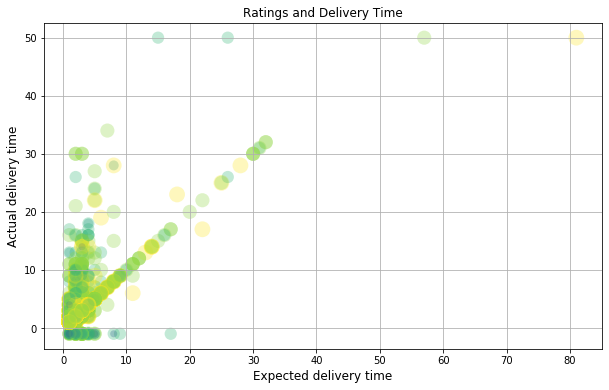

In [32]:
fig, ax = plt.subplots()

x = orders_small['Expected delivery time']
y = orders_small['Actual delivery time']

color = orders_small['Rating']
scale = orders_small['Rating'] * 50;
ax.scatter(x, y, c=color, s=scale, alpha=0.3, edgecolors='none')
# ax.scatter(x2, y2, c='pink', s=scale, alpha=0.7, edgecolors='none')
ax.grid(True)
fig.set_size_inches(10, 6)

# Set labels
plt.title('Ratings and Delivery Time')
ax.set_xlabel(r'Expected delivery time', fontsize=12)
ax.set_ylabel(r'Actual delivery time', fontsize=12)

plt.show()

As can be seen by the straight line going from (0,0) to about (48,48), most orders arrive at around the expected delivery time. There seems to be no correlation between late orders and ratings.

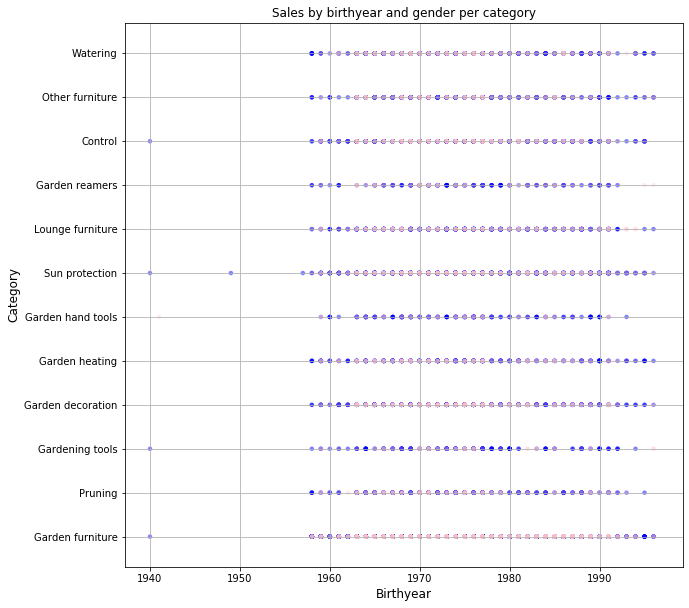

In [33]:
fig, ax = plt.subplots()

x = orders_small['Birthyear'][orders_small['Gender'] == 0]
y = orders_small['Category'][orders_small['Gender'] == 0]

x2 = orders_small['Birthyear'][orders_small['Gender'] == 1]
y2 = orders_small['Category'][orders_small['Gender'] == 1]

scale = 20

ax.scatter(x, y, c='blue', s=scale, alpha=0.5, edgecolors='none')
ax.scatter(x2, y2, c='pink', s=scale, alpha=0.3, edgecolors='none')
ax.grid(True)
fig.set_size_inches(10, 10)
# ax.set_xlim(40,60)

#set labels
plt.title('Sales by birthyear and gender per category')
ax.set_xlabel(r'Birthyear', fontsize=12)
ax.set_ylabel(r'Category', fontsize=12)

plt.show()

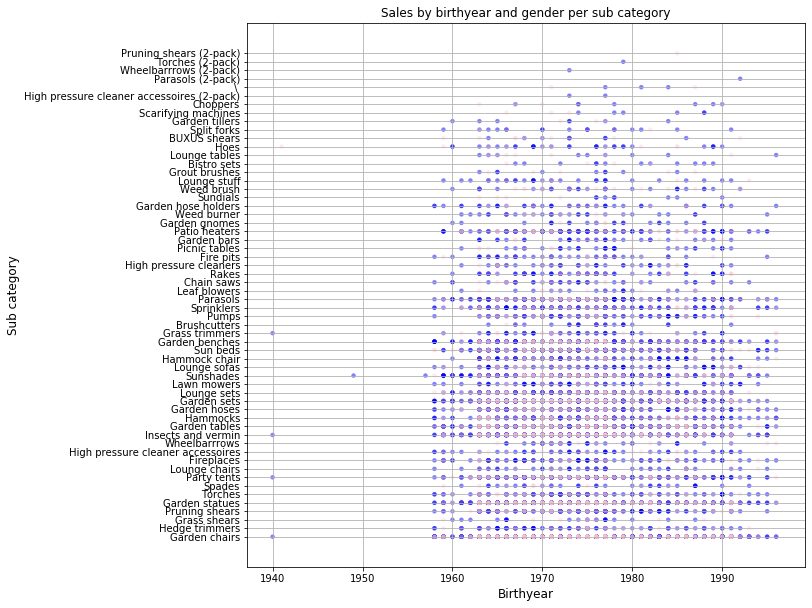

In [34]:
fig, ax = plt.subplots()

x = orders_small['Birthyear'][orders_small['Gender'] == 0]
y = orders_small['Sub category'][orders_small['Gender'] == 0]

x2 = orders_small['Birthyear'][orders_small['Gender'] == 1]
y2 = orders_small['Sub category'][orders_small['Gender'] == 1]

scale = 20

ax.scatter(x, y, c='blue', s=scale, alpha=0.5, edgecolors='none')
ax.scatter(x2, y2, c='pink', s=scale, alpha=0.3, edgecolors='none')
ax.grid(True)
fig.set_size_inches(10, 10)
# ax.set_xlim(40,60)

#set labels
plt.title('Sales by birthyear and gender per sub category')
ax.set_xlabel(r'Birthyear', fontsize=12)
ax.set_ylabel(r'Sub category', fontsize=12)

plt.show()

It seems from these plots there is a difference in buying behaviour between men and women. This may be useful for predictions.

### Expected vs actual delivery times

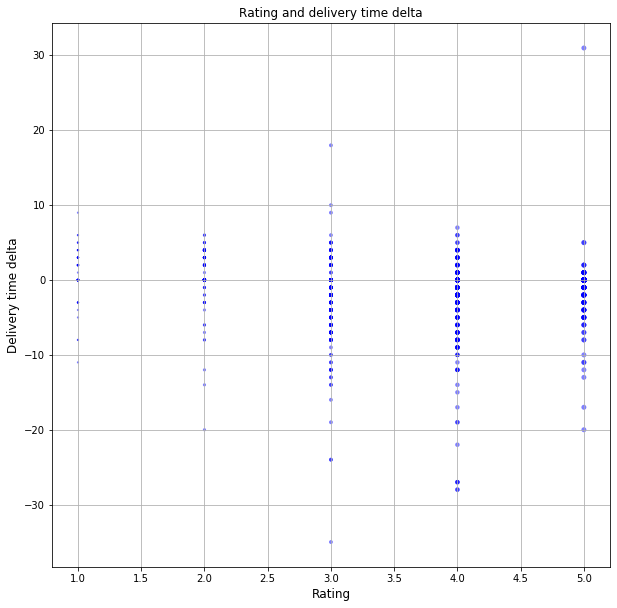

In [35]:
# Show plot comparing ratings and difference in actual vs expected delivery time
fig, ax = plt.subplots()

orders_rating = orders_small[orders_small['Rating'] > 0]

x = orders_rating['Rating']
y = orders_rating['Delivery time delta']

scale = x * 5

ax.scatter(x, y, c='blue', s=scale, alpha=0.5, edgecolors='none')
ax.grid(True)
fig.set_size_inches(10, 10)

# Set labels
plt.title('Rating and delivery time delta')
ax.set_xlabel(r'Rating', fontsize=12)
ax.set_ylabel(r'Delivery time delta', fontsize=12)

plt.show()

### Ratings per sub category

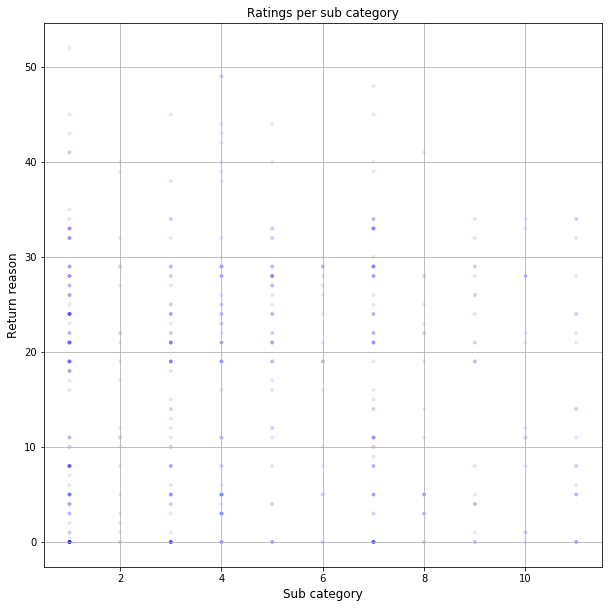

In [36]:
fig, ax = plt.subplots()

y = orders_small['Sub cat. number'][orders_small['Return reason number'] > 0]
x = orders_small['Return reason number'][orders_small['Return reason number'] > 0]

scale = 15

ax.scatter(x, y, c='blue', s=scale, alpha=0.1, edgecolors='none')
ax.grid(True)
fig.set_size_inches(10, 10)

#set labels
plt.title('Ratings per sub category')
ax.set_xlabel(r'Sub category', fontsize=12)
ax.set_ylabel(r'Return reason', fontsize=12)

plt.show()

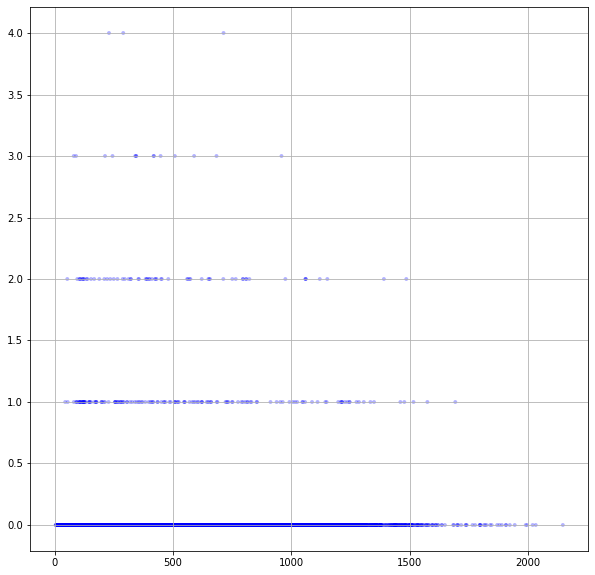

In [37]:
# Plot product price and count
fig, ax = plt.subplots()

x = pricePerProduct['Price']
y = pricePerProduct['Count']

scale = 15

ax.scatter(x, y, c='blue', s=scale, alpha=0.3, edgecolors='none')
ax.grid(True)
fig.set_size_inches(10, 10)
# ax.set_xlim(40,60)

#set labels
# plt.title('Ratings and returns due to delivery time')
# ax.set_xlabel(r'Sub category', fontsize=12)
# ax.set_ylabel(r'Return reason', fontsize=12)

plt.show()

More expensive products are likely to be bought less.

## Plot a heatmap

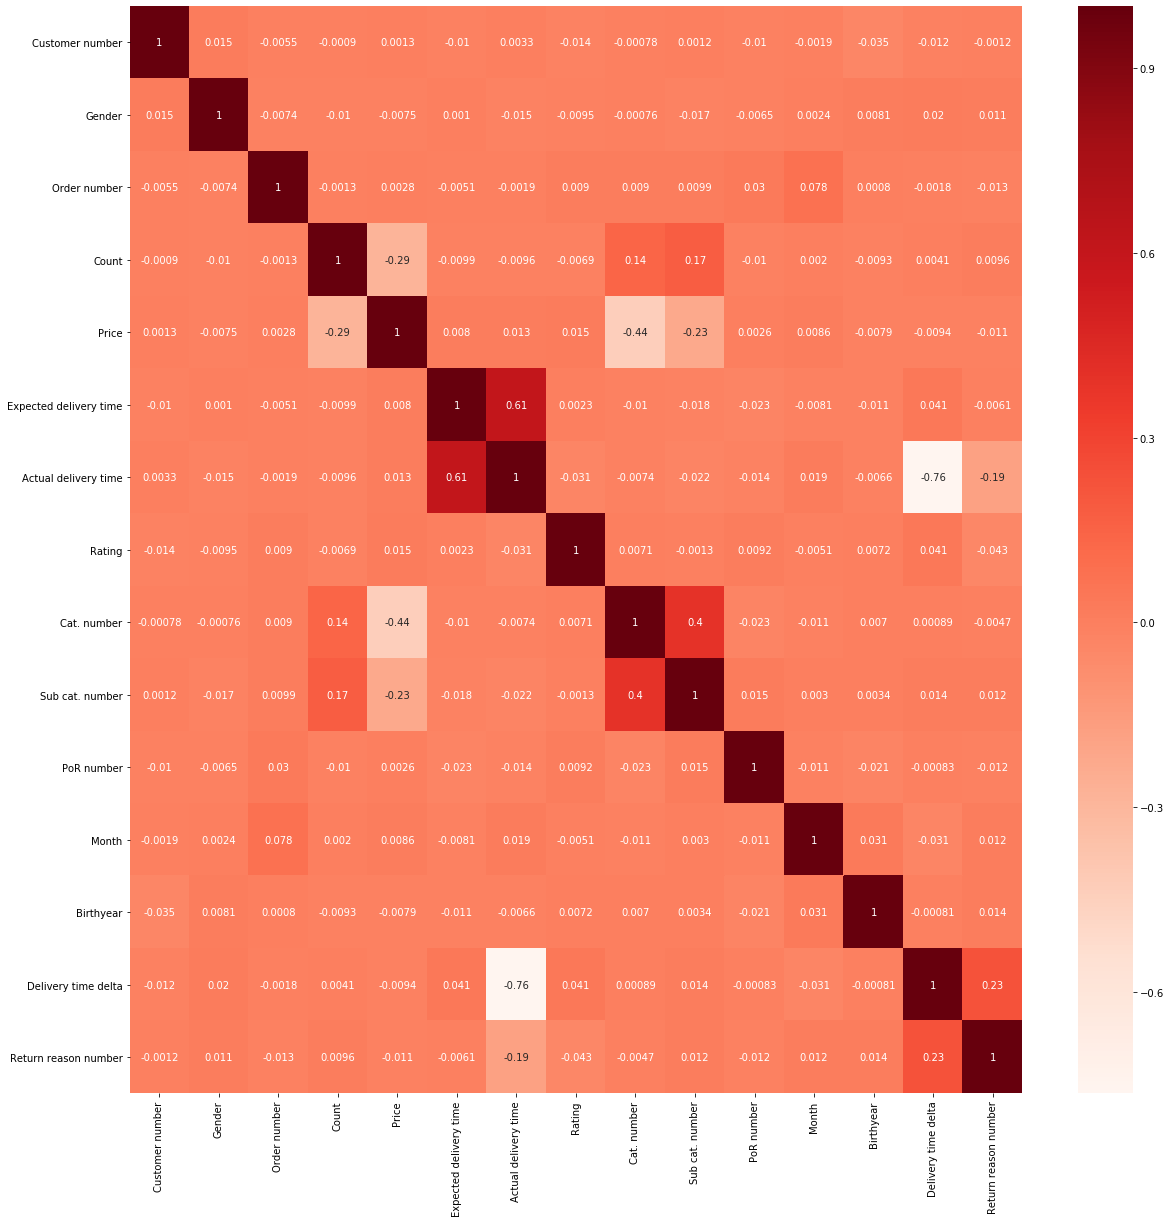

In [38]:
import seaborn as sns

plt.figure(figsize=(20,20))
cor = orders_small.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

# Predictive analysis

## Preparation

In [39]:
# Imports
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn import neighbors as n
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from scipy.stats import sem

from datetime import timedelta
from sklearn import linear_model

In [40]:
# Create set
orders_x = orders_small[['Birthyear', 'Gender', 'Month']]
orders_y = orders_small['Cat. number']

# Second set can be used to validate more
orders_x2 = orders_2[['Birthyear', 'Gender', 'Month']]
orders_y2 = orders_2['Cat. number']

In [41]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(orders_x, orders_y, test_size=0.2)

# Create normalised set
x_train_n = np.array(x_train)
y_train_n = np.array(y_train)
preprocessing.normalize(x_train_n)
preprocessing.normalize(y_train_n.reshape(-1,1))

# Show shapes to confirm compatibility
print(x_train_n.shape)
print(y_train_n.shape)

(8000, 3)
(8000,)


In [42]:
# Do the same for second set
orders_x2_n = np.array(orders_x2)
orders_y2_n = np.array(orders_y2)
preprocessing.normalize(orders_x2_n)
preprocessing.normalize(orders_y2_n.reshape(-1,1))

# Show shapes to confirm compatibility
print(orders_x2_n.shape)
print(orders_y2_n.shape)

(411200, 3)
(411200,)


### Preparing data for delivery time prediction as well

In [43]:
orders_small['Order date'] = pd.to_datetime(orders_small['Order date'])
orders_small['Expected delivery date'] = orders_small.apply(lambda row: row['Order date'] + timedelta(days=row['Expected delivery time']), axis = 1)
orders_small['Actual delivery date'] = orders_small.apply(lambda row: row['Order date'] + timedelta(days=row['Actual delivery time']), axis = 1)

In [44]:
orders_small['Order date timestamp'] = orders_small.apply(lambda row: row['Order date'].timestamp(), axis = 1)

In [45]:
# Get all unique pors
porTypes = orders_small['PoR'].unique()

# Create new column place of residence
orders_small['PlaceOfResidence'] = orders_small['PoR']
i = 0

for p in porTypes:
    orders_small['PlaceOfResidence'] = orders_small['PlaceOfResidence'].replace(p, str(i))
    i = i + 1

In [46]:
delivery_x = orders_small[['Order date timestamp', 'PlaceOfResidence', 'Expected delivery time']]
delivery_y = orders_small['Actual delivery time']

In [47]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(delivery_x, delivery_y, test_size=0.2)

## Predict what products new customers may buy based on their age, gender and possibly place or residence.

### Nearest Neighbors Model

In [48]:
nn = LinearSVC(class_weight='balanced', max_iter=2000, random_state=0)

n_neighbors = 30 # Value of 30 produces best results
clf = n.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(x_train_n, y_train_n)

# Calculate prediction
y_pred = clf.predict(x_test)
print("Accuracy: ", clf.score(x_test, y_test))

Accuracy:  0.0


In [49]:
# Create method for cross validation
def evaluate_cross_val(clf, x, y, k):
    kf = KFold(k, shuffle=True, random_state=0)
    scores = cross_val_score(clf, x, y, cv=kf)
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))
    
evaluate_cross_val(clf, x_train_n, y_train_n, 5)

[0.33125  0.34375  0.35     0.341875 0.33625 ]
Mean score: 0.341 (+/-0.003)


### Decision Trees Model

In [50]:
tr = DecisionTreeClassifier(random_state=0, min_samples_split=50)
tr.fit(x_train_n, y_train_n)

# Calculate prediction
y_pred = tr.predict(x_test)
print("Accuracy: ", tr.score(x_test, y_test))

Accuracy:  0.0135


In [51]:
# Cross validation
evaluate_cross_val(tr, x_train_n, y_train_n, 5)

[0.314375 0.3375   0.330625 0.34125  0.326875]
Mean score: 0.330 (+/-0.005)


#### Validate more using second set

In [52]:
# Calculate prediction
y_pred = tr.predict(orders_x2_n)
print("Accuracy: ", tr.score(orders_x2_n, orders_y2_n))

Accuracy:  0.3338715953307393


In [53]:
# Cross validation
evaluate_cross_val(tr, orders_x2_n, orders_y2_n, 5)

[0.35738084 0.35597033 0.35505837 0.35577578 0.35535019]
Mean score: 0.356 (+/-0.000)


### Random Forest Model

In [54]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(x_train_n, y_train_n)

# Calculate prediction
y_pred = rf.predict(x_test)
print("Accuracy: ", rf.score(x_test, y_test))

Accuracy:  0.0


In [55]:
# Cross validation
evaluate_cross_val(rf, x_train_n, y_train_n, 5)

[0.334375 0.3475   0.355625 0.35125  0.3425  ]
Mean score: 0.346 (+/-0.004)


### Validate more using second set

In [56]:
# Calculate prediction
y_pred = rf.predict(orders_x2_n)
print("Accuracy: ", rf.score(orders_x2_n, orders_y2_n))

Accuracy:  0.3560943579766537


In [57]:
# Cross validation
evaluate_cross_val(rf, orders_x2_n, orders_y2_n, 5)

[0.35764835 0.35610409 0.35527724 0.35600681 0.3556177 ]
Mean score: 0.356 (+/-0.000)


## Plotting learning curves for first predictions

In [58]:
# Create method for curve
def learning_curves(estimator, data, features, target, train_sizes, cv, scoring):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, 
        data[features], 
        data[target],
        train_sizes = train_sizes,
        cv = cv, 
        scoring = scoring)
    
    train_scores_mean =  train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training score')
    plt.plot(train_sizes, validation_scores_mean, label = 'Cross-Validation score')

    plt.ylabel('Score', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)

### Decision Trees Curve

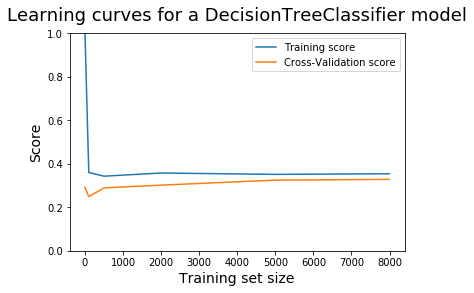

In [59]:
X = ['Gender', 'Birthyear', 'Month']
y = 'Cat. number'
train_sizes = [1, 100, 500, 2000, 5000, 7996]
cv = 5

learning_curves(tr, orders_small, X, y, train_sizes, cv, scoring = "accuracy")

### Random Forest Curve

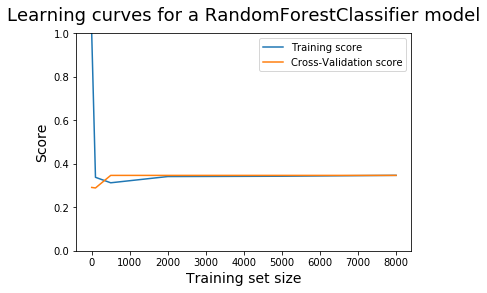

In [60]:
learning_curves(rf, orders_small, X, y, train_sizes, cv, scoring = "accuracy")

## Predicting actual delivery time

### SGD Classifier Model

In [61]:
sgd = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(x_train_n, y_train_n)

y_pred = sgd.predict(x_test)
evaluate_cross_val(sgd, x_train, y_train, 5)

[0.193125 0.19375  0.25625  0.249375 0.26    ]
Mean score: 0.230 (+/-0.015)


### Nearest Neighbors Model

In [62]:
nn = LinearSVC(class_weight='balanced', max_iter=2000, random_state=0)

n_neighbors = 30 # value of 30 produces best results
clf = n.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(x_train, y_train)

# calculate prediction
y_pred = clf.predict(x_test)
evaluate_cross_val(clf, x_train, y_train, 5)

[0.248125 0.224375 0.240625 0.231875 0.238125]
Mean score: 0.237 (+/-0.004)


### Decision Trees Model

In [63]:
tr2 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10, min_samples_leaf = 20, random_state=0, min_samples_split=50)
tr2.fit(x_train, y_train)

y_pred = tr2.predict(x_test)
evaluate_cross_val(tr2, x_train, y_train, 5)

[0.705    0.706875 0.694375 0.703125 0.711875]
Mean score: 0.704 (+/-0.003)


### Random Forest Model

In [64]:
rf2 = RandomForestClassifier(n_estimators=100, criterion = 'entropy',max_depth = 10, min_samples_leaf = 20, random_state=0, min_samples_split=50)
rf2.fit(x_train, y_train)

y_pred = rf2.predict(x_test)
evaluate_cross_val(rf2, x_train, y_train, 5)

[0.683125 0.68875  0.671875 0.67625  0.685625]
Mean score: 0.681 (+/-0.003)


## Plot learning curvers for second prediction

In [72]:
X2 = ['Order date timestamp', 'PlaceOfResidence', 'Expected delivery time']
y2 = 'Actual delivery time'
train_sizes = [1, 100, 500, 2000, 5000, 7982]

### Decision Trees Curve

C:\Users\sverr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


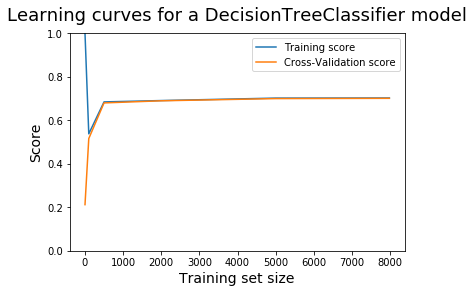

In [73]:
learning_curves(tr2, orders_small, X2, y2, train_sizes, cv, scoring = "accuracy")

C:\Users\sverr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


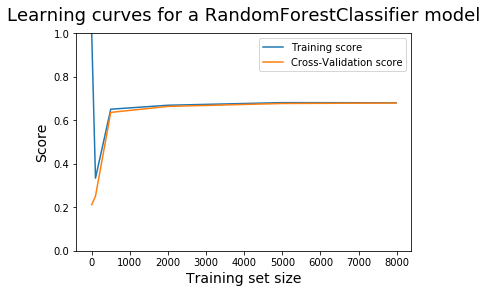

In [74]:
learning_curves(rf2, orders_small, X2, y2, train_sizes, cv, scoring = "accuracy")